In [10]:
import opendatasets as od

In [11]:
od.download('stackoverflow-developer-survey-2020')

94609408it [00:51, 1836129.63it/s]                              


16384it [00:00, 27612.75it/s]           


8192it [00:00, 15042.61it/s]            


In [12]:
import os

In [13]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [14]:
import pandas as pd

In [15]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [16]:
survey_raw_df

Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes   

        Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0       NaN         13  Monthly        NaN            NaN             Germany   
1       NaN         19      NaN        NaN            NaN      United Kingdom   
2       NaN         15      NaN        NaN            NaN  Russian Federation   
3      25.0         18      NaN        NaN            NaN             Albania   
4      31.0         16      NaN        NaN            NaN       United States   
...     ...        ...      ...        ...            ...                 ...   
64456   NaN         16      NaN        NaN            NaN       United States   
64457   NaN        NaN      NaN        NaN            NaN             Morocco   
64458   NaN        NaN      NaN        NaN            NaN            Viet Nam   
64459   NaN        NaN      NaN        NaN            NaN              Poland   
64460   NaN        NaN      NaN        NaN            NaN               Spain   

         CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0       European Euro  ...  Neither easy nor difficult  Appropriate in length   
1      Pound sterling  ...                         NaN                    NaN   
2                 NaN  ...  Neither easy nor difficult  Appropriate in length   
3        Albanian lek  ...                         NaN                    NaN   
4                 NaN  ...                        Easy              Too short   
...               ...  ...                         ...                    ...   
64456             NaN  ...                         NaN                    NaN   
64457             NaN  ...                         NaN                    NaN   
64458             NaN  ...                         NaN                    NaN   
64459             NaN  ...                         NaN                    NaN   
64460             NaN  ...                         NaN                    NaN   

      Trans                                     UndergradMajor  \
0        No  Computer science, computer engineering, or sof...   
1       NaN  Computer science, computer engineering, or sof...   
2       NaN                                                NaN   
3        No  Computer science, computer engineering, or sof...   
4        No  Computer science, computer engineering, or sof...   
...     ...                                                ...   
64456   NaN  Computer science, computer engineering, or sof...   
64457   NaN                                                NaN   
64458   NaN                                                NaN   
64459   NaN                                                NaN   
64460   NaN  Computer science, computer engineering, or sof...   

            WebframeDesireNextYear                      WebframeWorkedWith  \
0                     ASP.NET Core                    ASP.NET;ASP.NET Core   
1                              NaN                                     NaN   
2                              NaN                           

In [17]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [21]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [19]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [20]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [22]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [23]:
len(selected_columns)

20

In [24]:
survey_df = survey_raw_df[selected_columns].copy()

In [25]:
schema = schema_raw[selected_columns]

In [26]:
survey_df.shape

(64461, 20)

In [27]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [28]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [29]:
survey_df.describe()

Age    Age1stCode     YearsCode  YearsCodePro   WorkWeekHrs
count  45446.000000  57473.000000  56784.000000  44133.000000  41151.000000
mean      30.834111     15.476572     12.782051      8.869667     40.782174
std        9.585392      5.114081      9.490657      7.759961     17.816383
min        1.000000      5.000000      1.000000      1.000000      1.000000
25%       24.000000     12.000000      6.000000      3.000000     40.000000
50%       29.000000     15.000000     10.000000      6.000000     40.000000
75%       35.000000     18.000000     17.000000     12.000000     44.000000
max      279.000000     85.000000     50.000000     50.000000    475.000000

In [30]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [31]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [32]:
survey_df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [33]:
import numpy as np

In [34]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [35]:
survey_df.sample(10)

Country   Age Gender  \
40124                Peru   NaN    NaN   
51562              Sweden  29.0    Man   
60504             Germany  25.0    Man   
47412       United States  28.0    Man   
881         United States  35.0    Man   
1563   Russian Federation  36.0    Man   
3329        United States  30.0    Man   
4230        United States  29.0    Man   
24325          Bangladesh  25.0    Man   
9904            Singapore   NaN    Man   

                                                 EdLevel  \
40124                                                NaN   
51562  Secondary school (e.g. American high school, G...   
60504  Secondary school (e.g. American high school, G...   
47412       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
881         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
1563     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3329   Some college/university study without earning ...   
4230        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
24325       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
9904     Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                          UndergradMajor Hobbyist  Age1stCode  \
40124                                                NaN       No         NaN   
51562                                                NaN      Yes        10.0   
60504                                                NaN      Yes        13.0   
47412  Computer science, computer engineering, or sof...      Yes        14.0   
881    Computer science, computer engineering, or sof...      Yes        30.0   
1563   Computer science, computer engineering, or sof...      Yes         7.0   
3329   Computer science, computer engineering, or sof...      Yes        12.0   
4230   Computer science, computer engineering, or sof...      Yes        18.0   
24325  Computer science, computer engineering, or sof...      Yes        22.0   
9904   Computer science, computer engineering, or sof...      Yes        16.0   

       YearsCode  YearsCodePro  \
40124        NaN           NaN   
51562       19.0           4.0   
60504        5.0           3.0   
47412       10.0           4.0   
881          5.0           1.0   
1563        29.0          15.0   
3329        15.0          13.0   
4230        12.0           9.0   
24325        4.0           1.0   
9904        13.0           5.0   

                                      LanguageWorkedWith  \
40124                                                NaN   
51562  Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...   
60504  Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...   
47412                         C#;HTML/CSS;JavaScript;SQL   
881    Bash/Shell/PowerShell;C#;C++;JavaScript;Python...   
1563   Bash/Shell/PowerShell;C;C#;C++;Java;JavaScript...   
3329   Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScr...   
4230               C#;HTML/CSS;JavaScript;SQL;TypeScript   
24325  Assembly;Bash/Shell/PowerShell;C;HTML/CSS;Java...   
9904             C;C#;HTML/CSS;JavaScript;SQL;TypeScript   

                                  LanguageDesireNextYear  \
40124                                                NaN   
51562                  Bash/Shell/PowerShell;Python;Rust   
60504  Bash/Shell/PowerShell;C++;HTML/CSS;Java;JavaSc...   
47412  Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...   
881                Bash/Shell/PowerShell;Python;Rust;SQL   
1563              Bash/Shell/PowerShell;C;C++;Python;SQL   
3329   Bash/Shell/PowerShell;Dart;Go;JavaScript;Rust;...   
4230        C#;HTML/CSS;JavaScript;Kotlin;SQL;TypeScript   
24325  Bash/Shell/PowerShell;Dart;Go;HTML/CSS;Java;Ja...   
9904   C;C#;Go;HTML/CSS;JavaScript;Kotlin;SQL;TypeScript   

                   NEWLearn  \
40124                   NaN   
51562           Once a year   
60504           Once a year   
47412  Once every few years   
881                     NaN   
1563       Every few months   
3329       Every few months   
4230            Once a year   
24325                   Na

## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. 

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [37]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [38]:
schema.Country

'Where do you live?'

In [39]:
survey_df.Country.nunique()

183

In [40]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

In [ ]:
import plotly.express as px

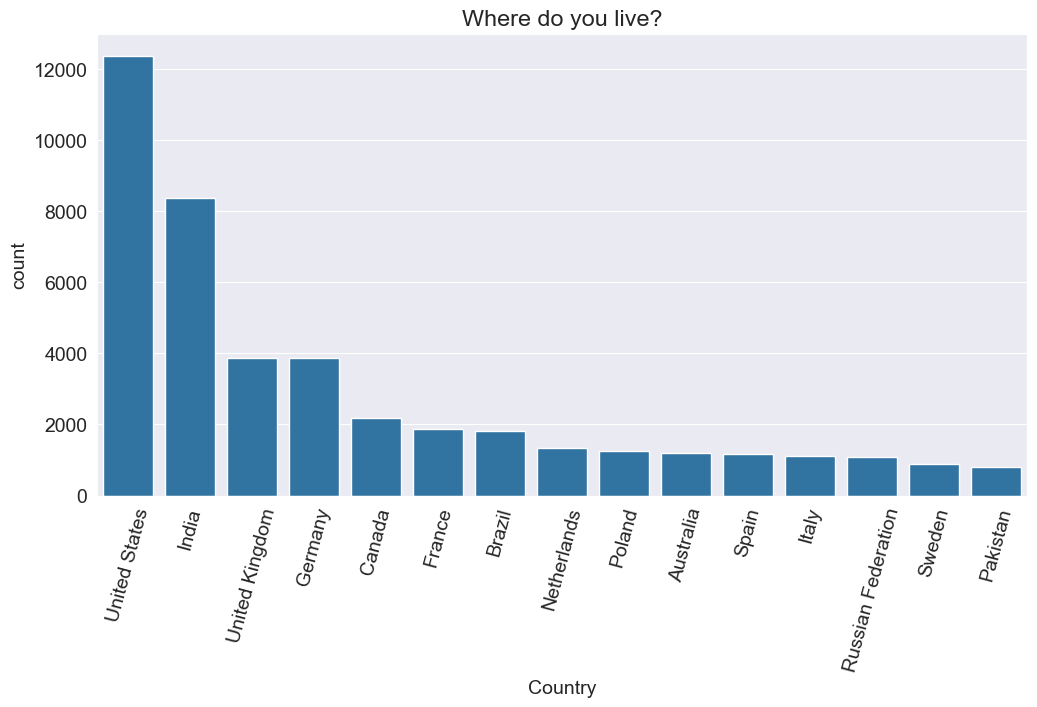

In [41]:


# Prepare the data
top_countries_df = survey_df.Country.value_counts().head(15).reset_index()
top_countries_df.columns = ['Country', 'Number of Responses']

# Create the interactive bar plot
fig = px.bar(top_countries_df, x='Country', y='Number of Responses', title='Top 15 Countries with Highest Responses')
fig.update_layout(xaxis_title='Country', yaxis_title='Number of Responses', xaxis_tickangle=-45)
fig.show()


### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

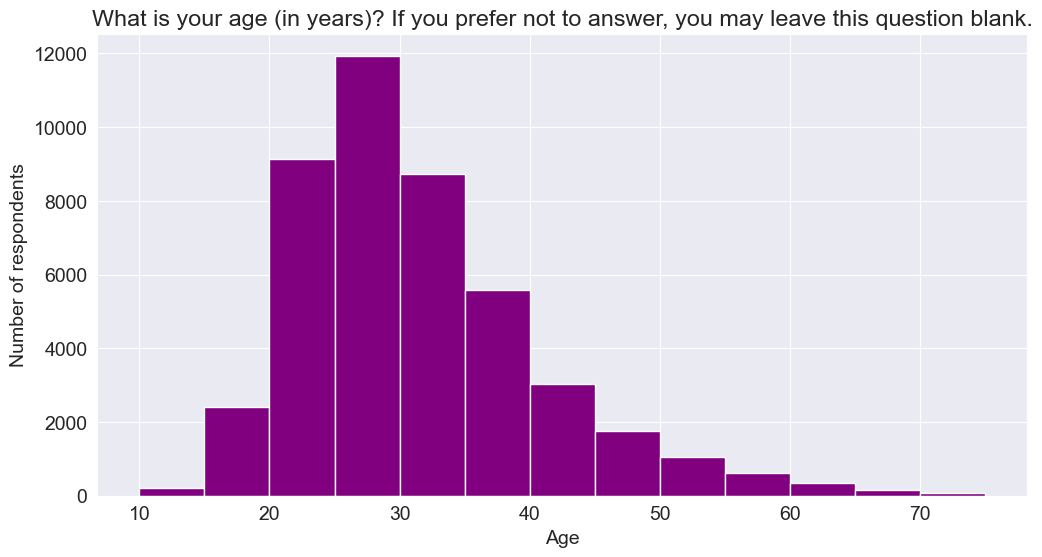

In [42]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [43]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [44]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

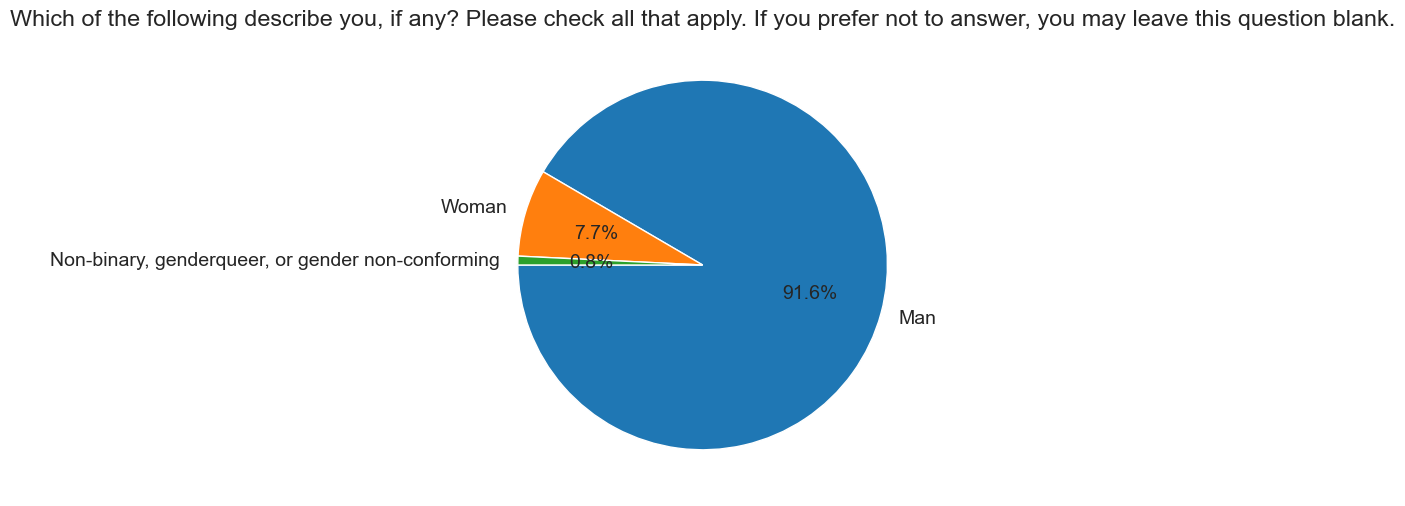

In [45]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

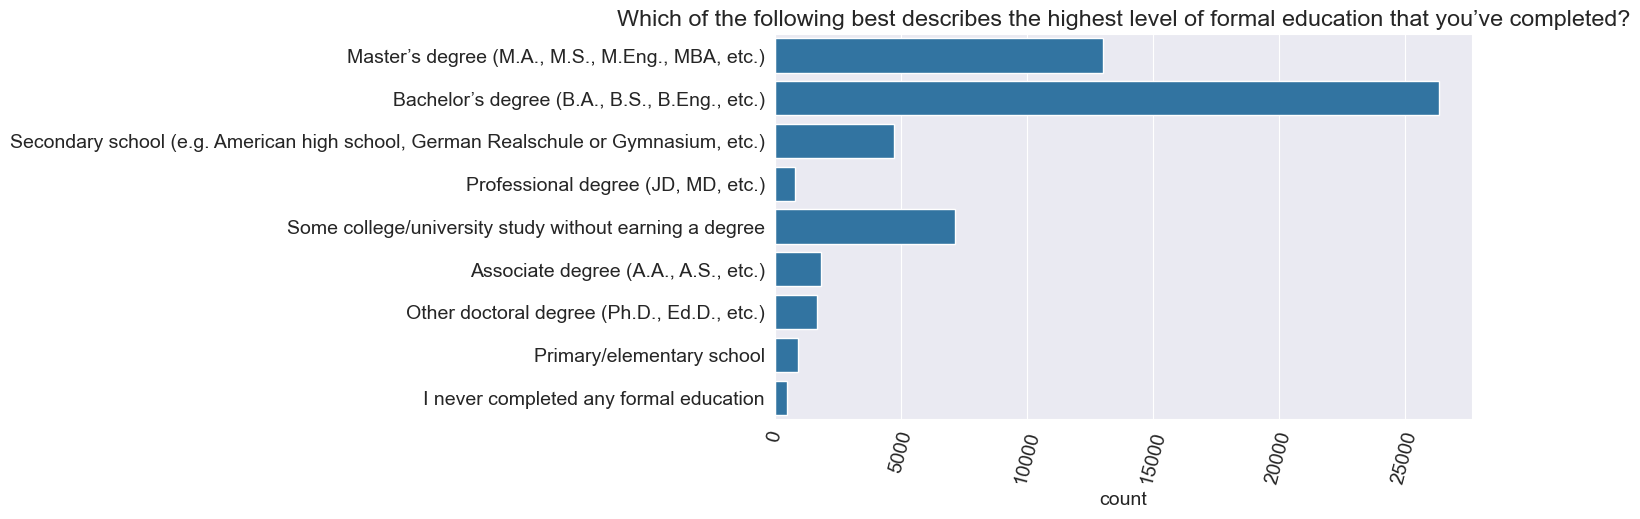

In [46]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [47]:
schema.UndergradMajor

'What was your primary field of study?'

In [48]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [49]:
schema.Employment

'Which of the following best describes your current employment status?'

In [50]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [51]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [52]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                                          4396
Developer, back-end                                                                                                                                                                            3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                 2214
Developer, back-end;Developer, full-stack                                                                                                                                                      1465
Developer, front-end                                                                                                                                                                           1390
            

Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [71]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].items():
        # Break each value into a list of options
        for option in value.split(';'):
            # Add the option as a column to the result
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]


In [72]:
dev_type_df = split_multicolumn(survey_df.DevType)


In [74]:
dev_type_df

Developer, desktop or enterprise applications  Developer, full-stack  \
0                                               True                   True   
1                                              False                   True   
2                                              False                  False   
3                                              False                  False   
4                                              False                  False   
...                                              ...                    ...   
64456                                          False                  False   
64457                                          False                  False   
64458                                          False                  False   
64459                                          False                  False   
64460                                          False                  False   

       Developer, mobile  Designer  Developer, front-end  Developer, back-end  \
0                  False     False                 False                False   
1                   True     False                 False                False   
2                  False     False                 False                False   
3                  False     False                 False                False   
4                  False     False                 False                False   
...                  ...       ...                   ...                  ...   
64456              False     False                 False                False   
64457              False     False                 False                False   
64458              False     False                 False                False   
64459              False     False                 False                False   
64460              False     False                 False                False   

       Developer, QA or test  DevOps specialist  Developer, game or graphics  \
0                      False              False                        False   
1                      False              False                        False   
2                      False              False                        False   
3                      False              False                        False   
4                      False              False                        False   
...                      ...                ...                          ...   
64456                  False              False                        False   
64457                  False              False                        False   
64458                  False              False                        False   
64459                  False              False                        False   
64460                  False              False                        False   

       Database administrator  ...  System administrator  Engineering manager  \
0                       False  ...                 False                False   
1                       False  ...                 False                False   
2                       False  ...                 False                False   
3                       False  ...                 False                False   
4                       False  ...                 False                False   
...                       ...  ...                   ...                  ...   
64456                   False  ...                 False                False   
64457                   False  ...                 False                False   
64458                   False  ...                 False                False   
64459                   False  ...                 False                False   
64460                   False  ...                 False                False   

       Product manager  Data or business analyst  Academic researcher  \
0                False                     False                False   
1    

The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.

In [75]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

#### Q: What are the most popular programming languages in 2020? 

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [77]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [78]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [79]:
languages_worked_df

C#  HTML/CSS  JavaScript  Swift  Objective-C  Python   Ruby    SQL  \
0       True      True        True  False        False   False  False  False   
1      False     False        True   True        False   False  False  False   
2      False     False       False   True         True    True  False  False   
3      False     False       False  False        False   False  False  False   
4      False      True       False  False        False   False   True   True   
...      ...       ...         ...    ...          ...     ...    ...    ...   
64456  False     False       False  False        False   False  False  False   
64457   True      True        True   True         True    True   True   True   
64458  False     False       False  False        False   False  False  False   
64459  False      True       False  False        False   False  False  False   
64460   True      True        True  False        False   False  False   True   

        Java    PHP  ...    VBA   Perl  Scala    C++     Go  Haskell   Rust  \
0      False  False  ...  False  False  False  False  False    False  False   
1      False  False  ...  False  False  False  False  False    False  False   
2      False  False  ...  False  False  False  False  False    False  False   
3      False  False  ...  False  False  False  False  False    False  False   
4      False  False  ...  False  False  False  False  False    False  False   
...      ...    ...  ...    ...    ...    ...    ...    ...      ...    ...   
64456  False  False  ...  False  False  False  False  False    False  False   
64457   True   True  ...   True   True   True   True   True     True   True   
64458  False  False  ...  False  False  False  False  False    False  False   
64459  False  False  ...  False  False  False  False  False    False  False   
64460   True  False  ...  False  False  False  False  False    False  False   

        Dart  Julia  Assembly  
0      False  False     False  
1      False  False     False  
2      False  False     False  
3      False  False     False  
4      False  False     False  
...      ...    ...       ...  
64456  False  False     False  
64457   True   True      True  
64458  False  False     False  
64459  False  False     False  
64460  False  False     False  

[64306 rows x 25 columns]

In [80]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

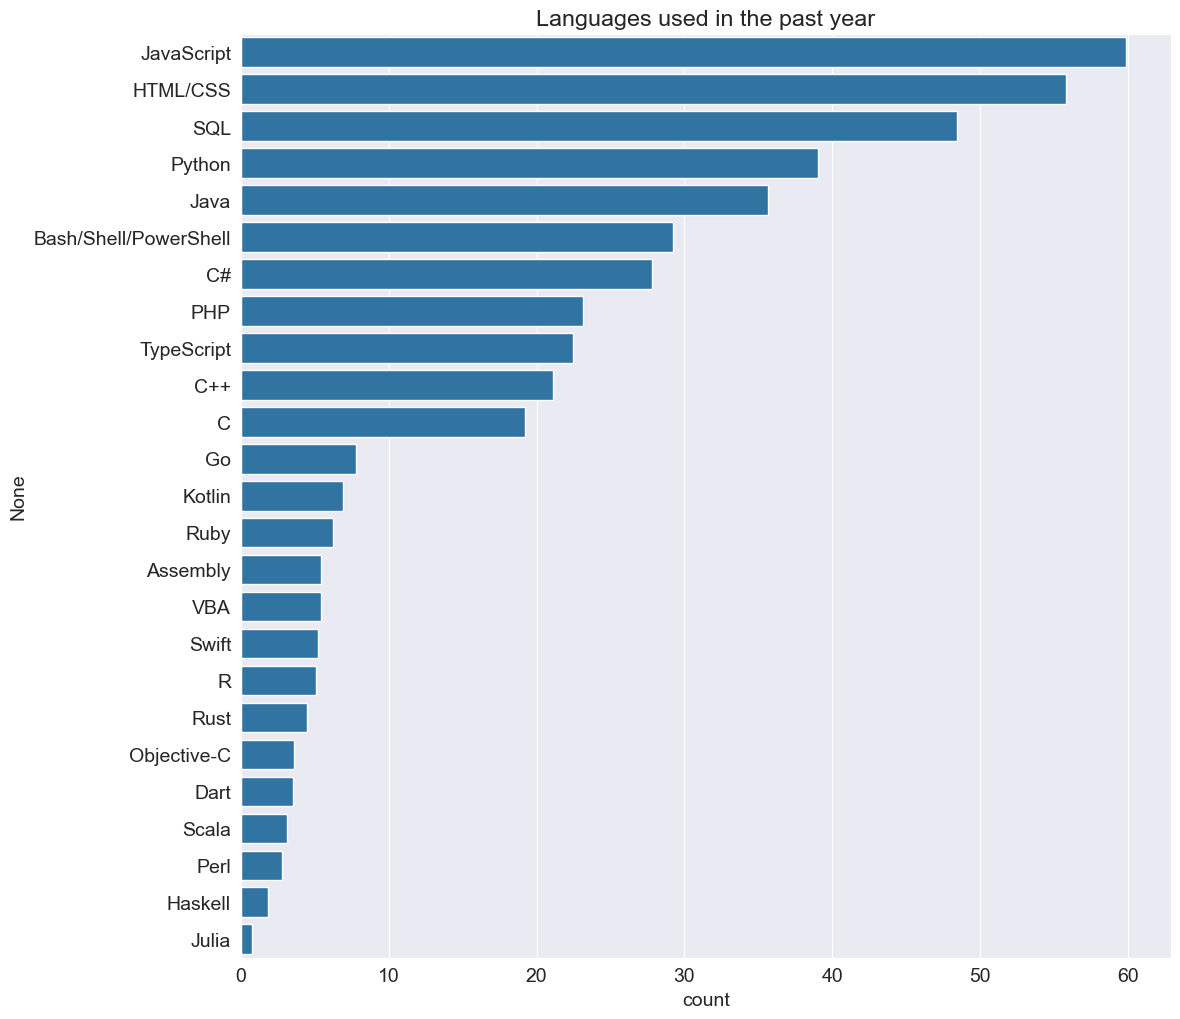

In [81]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

#### Q: Which languages are the most people interested to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [83]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

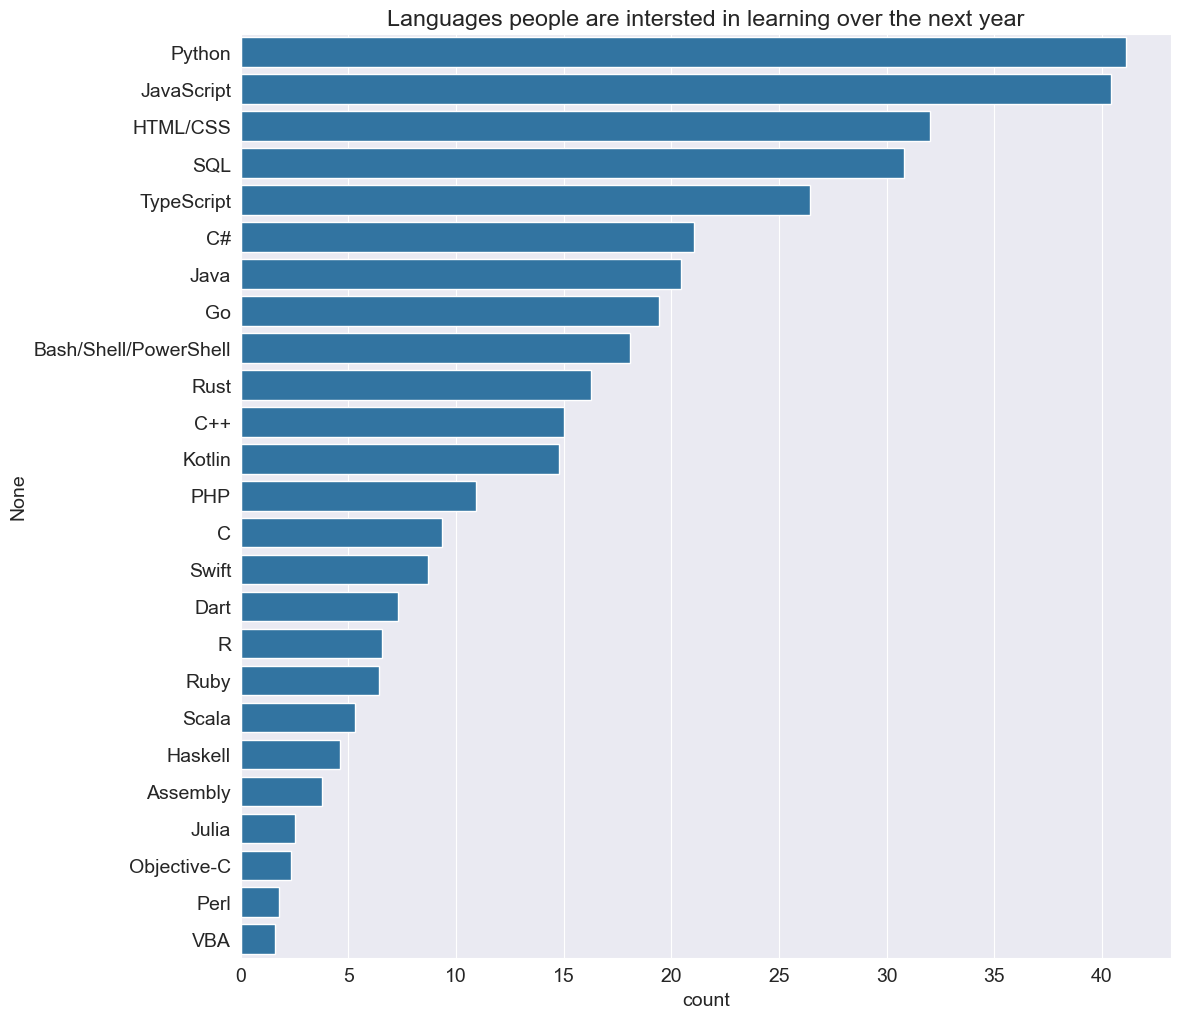

In [84]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

#### Q:  Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

While this question may seem tricky at first, it's straightforward to solve using Pandas array operations. Here's what we can do:

- Create a new data frame `languages_loved_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_interested_df` are both `True`
- Take the column-wise sum of `languages_loved_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who "love" the language
- Sort the results in decreasing order and plot a horizontal bar graph

In [86]:
languages_loved_df = languages_worked_df & languages_interested_df

In [87]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

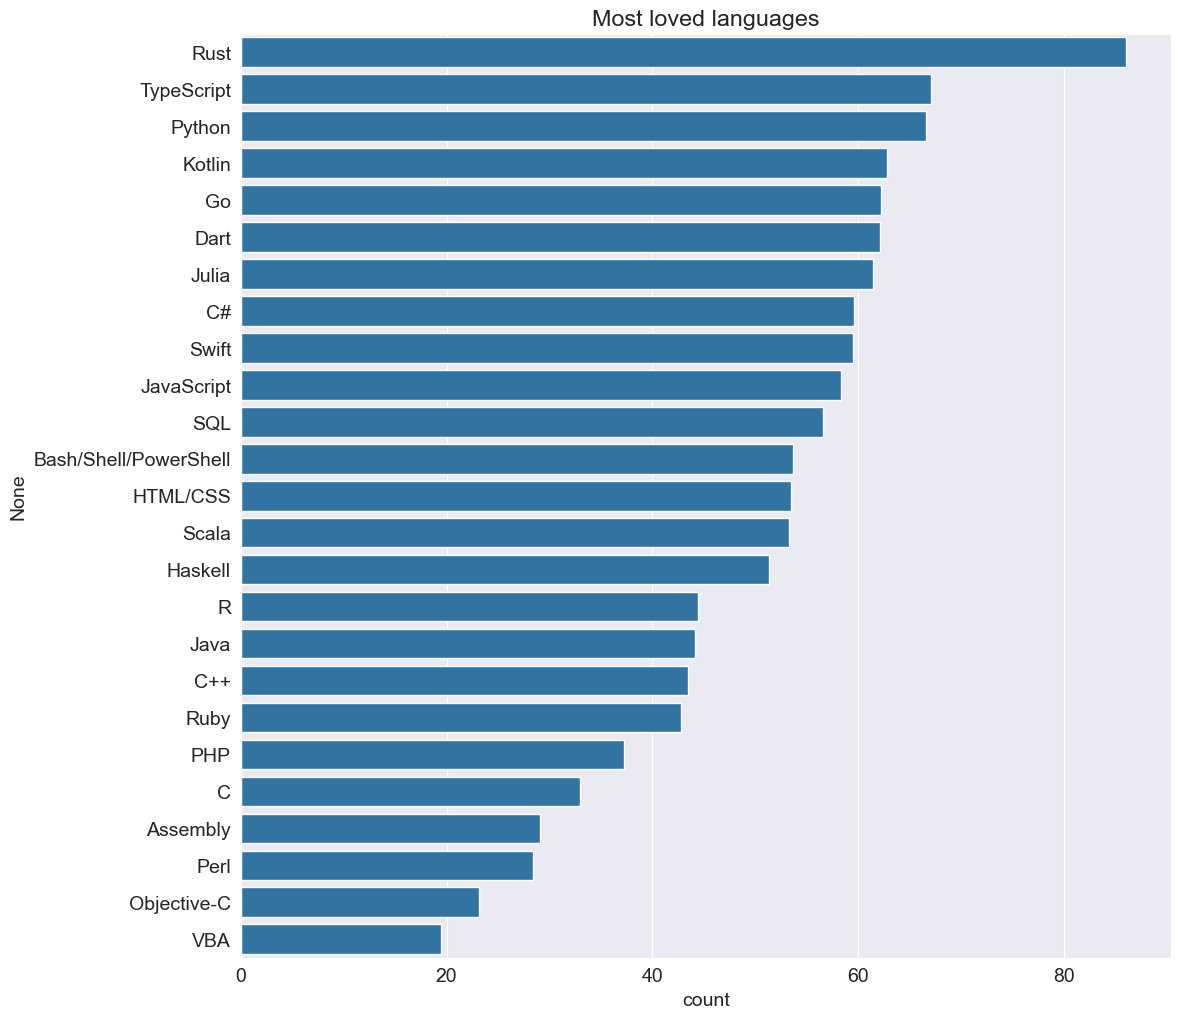

In [88]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

#### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

To answer this question, we'll need to use the `groupby` data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.

In [90]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [91]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [92]:
high_response_countries_df

WorkWeekHrs
Country                   
Iran             44.337748
Israel           43.915094
China            42.150000
United States    41.802982
Greece           41.402724
Viet Nam         41.391667
South Africa     41.023460
Turkey           40.982143
Sri Lanka        40.612245
New Zealand      40.457551
Belgium          40.444444
Canada           40.208837
Hungary          40.194340
Bangladesh       40.097458
India            40.090603

#### Q: How important is it to start young to build a career in programming?

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [94]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

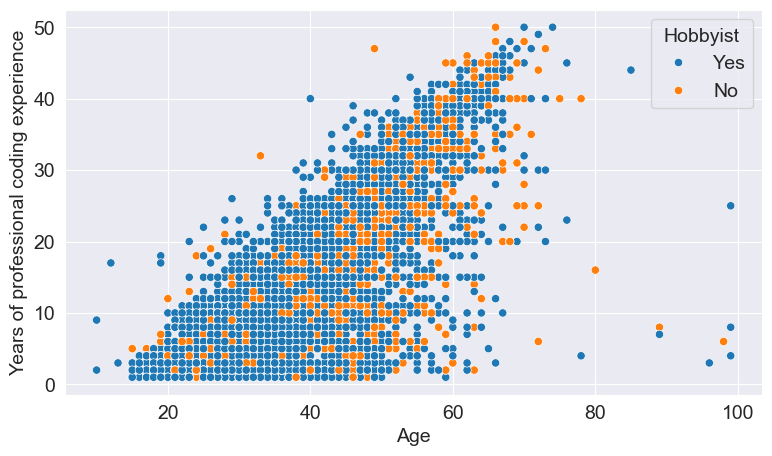

In [95]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

In [96]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);